## Total estimated annual dollar value of utility discounts for businesses approved for ECSP benefits during the fiscal year

### Day-4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,04/02/2008,136578.20,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,1238.0,NaN,NaN,01/05/2015,302959.40,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,02/03/2020,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,06/30/2017,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
5,"120 Wall Street, LLC",Jason McCalla,jmccalla@silvprop.com,2125517391,120 Wall Street,New York,NY,10005,Commercial,Back Offices,LMEP,958.0,NaN,NaN,07/02/2015,368601.17,2090906.36,New York,40.704380,-74.006427,101.0,1.0,7.0,1000871.0,1.000370e+09,Battery Park City-Lower Manhattan
6,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,Limousine Service,ECSP,125.0,NaN,NaN,04/07/2008,1637.29,129401.39,Queens,40.745706,-73.929565,402.0,26.0,179.0,4003160.0,4.002220e+09,Hunters Point-Sunnyside-West Maspeth
7,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,Dist. of prepacked salads,ECSP,6.0,NaN,NaN,12/08/2009,4380.51,59681.70,Staten Island,40.633153,-74.150999,501.0,49.0,239.0,5146740.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
8,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,Electrical Parts Mfg.,ECSP,35.0,NaN,NaN,03/04/2011,2534.00,28752.48,Queens,40.785144,-73.844833,407.0,19.0,929.0,4098344.0,4.040850e+09,College Point
9,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,Commercial Storage facility,ECSP,9.0,NaN,NaN,11/06/2015,31483.87,187637.74,Brooklyn,40.673106,-74.002300,306.0,38.0,53.0,3336622.0,3.005720e+09,Carroll Gardens-Columbia Street-Red Hook


In [4]:
df['Effective Date'] = pd.to_datetime(df['Effective Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Company Name                               450 non-null    object        
 1   company contact                            450 non-null    object        
 2   company email                              433 non-null    object        
 3   company phone                              450 non-null    object        
 4   Address                                    450 non-null    object        
 5   City                                       450 non-null    object        
 6   State                                      450 non-null    object        
 7   Postcode                                   450 non-null    int64         
 8   Industry                                   450 non-null    object        
 9   Industry descr       

In [6]:
# Total number of different companies
len(df['Company Name'].unique())

439

In [7]:
# The  total number of jobs created for businesses in Queens
np.sum(df[df['City']=='Queens']['Job created'])

90.0

In [8]:
# Number of different unique email domains names are there in the data set
# Get non-Nan email info
emails=df[~df['company email'].isna()]['company email'] 

# actual (or correct) emails that contain @
correct_emails=[x for x in emails if '@' in x ]

# Get domains
domains=[email.split('@')[-1] for email in correct_emails]

# Get unique domains
len(set(domains))

356

In [9]:
# Considering only NTAs with at least 5 listed businesses, 
from collections import Counter

# df with non_nan ntas
ntas_df=df[~df['NTA'].isna()]

# ntas that appear 5 at least
ntas=[key for key in dict(Counter(ntas_df['NTA'])) if dict(Counter(ntas_df['NTA']))[key]>=5]

# ntas that has at least 5 listed businesses

ntas_5=[nta for nta in ntas if len(df[df['NTA']==nta]['Company Name'].unique())>=5]

# entries with ntas that have at least 5 listed businesses
ntas_df=df[df['NTA'].isin(ntas)]

# what is the average total savings and the total jobs created for each NTA?
# avg_total_savings = np.mean(ntas_df['Total Savings'])
# print(avg_total_savings)
total_job_created = ntas_df.groupby('NTA')[['Total Savings', 'Job created']].agg(['mean', 'sum'])
answer=total_job_created.iloc[:, [0, 3]]
answer.to_csv('day4_q5.csv')#, index=False)

### Day-5

In [10]:
day4=pd.read_csv('day4_q5.csv', index_col=0, header=[0,1], na_filter=False)
day4

,Total Savings,Job created
,mean,sum
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0


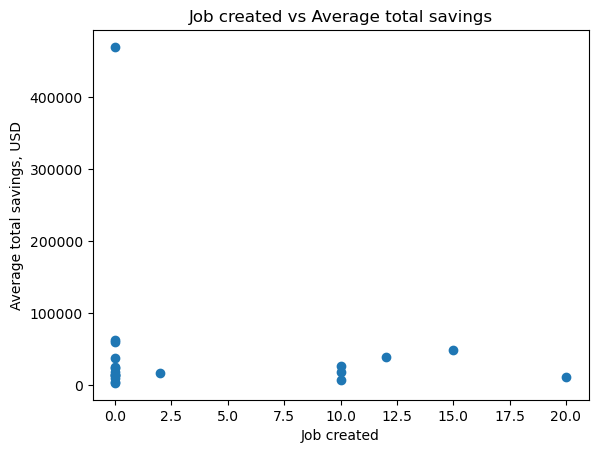

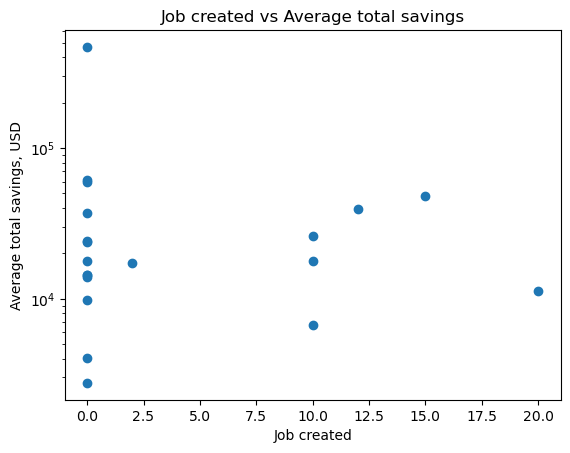

In [11]:
# Scatter plot of jobs created versus average savings
plt.scatter(day4['Job created'], day4['Total Savings'])
plt.title('Job created vs Average total savings')
plt.xlabel('Job created')
plt.ylabel('Average total savings, USD')
# plt.yscale('log')
plt.show();
plt.scatter(day4['Job created'], day4['Total Savings'])
plt.title('Job created vs Average total savings')
plt.xlabel('Job created')
plt.ylabel('Average total savings, USD')
plt.yscale('log')
plt.show();

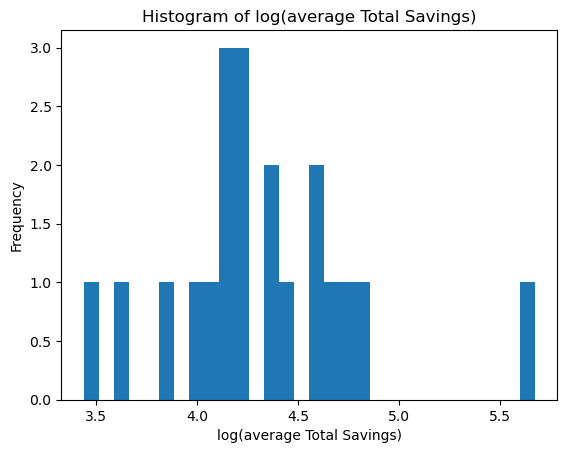

In [12]:
# Histogram of the log of the average total savings.
plt.hist(np.log10(day4['Total Savings']), bins=30)
plt.title('Histogram of log(average Total Savings)')
plt.xlabel('log(average Total Savings)')
plt.ylabel('Frequency')
plt.show();

In [13]:
# create month column
df['month']=df['Effective Date'].dt.month

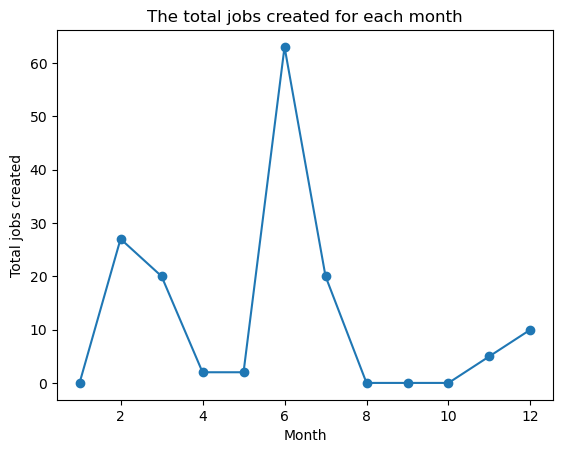

In [14]:
# Line plot of the total jobs created for each month.
plt.plot(df.groupby('month')['Job created'].sum(), marker='o')
plt.title('The total jobs created for each month')
plt.xlabel('Month')
plt.ylabel('Total jobs created')
plt.show();

### Day 7

In [15]:
from bs4 import BeautifulSoup

In [35]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup)
print(soup.prettify())

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>
<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   

In [17]:
soup.title

<title>The Dormouse's story</title>

In [18]:
soup.title.name

'title'

In [38]:
soup.title.string
# soup.title.text

"The Dormouse's story"

In [20]:
soup.title.parent.name

'head'

In [21]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [22]:
soup.p['class']

['title']

In [23]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [24]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [25]:
soup.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [26]:
for link in soup.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [27]:
print(soup.get_text())

The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [28]:
# pip install beautifulsoup4

In [29]:
# pip install lxml

In [30]:
# pip install html5lib

In [31]:
# pip install requests

In [44]:
from bs4 import BeautifulSoup
import requests

url = 'http://coreyms.com'
source = requests.get(url).text
soup = BeautifulSoup(source, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- This site is optimized with the Yoast SEO plugin v15.4 - https://yoast.com/wordpress/plugins/seo/ -->
  <title>
   CoreyMS - Development, Design, DIY, and more
  </title>
  <meta content="Development, Design, DIY, and more" name="description"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <link href="https://coreyms.com/" rel="canonical"/>
  <link href="https://coreyms.com/page/2" rel="next"/>
  <meta content="en_US" property="og:locale"/>
  <meta content="website" property="og:type"/>
  <meta content="CoreyMS - Development, Design, DIY, and more" property="og:title"/>
  <meta content="Development, Design, DIY, and more" property="og:description"/>
  <meta content="https://coreyms.com/" property="og:url"/>
  <meta content="CoreyMS" property="og:site_name"/>
  <meta content